In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Asthma_Milan.csv'
asthma_data = pd.read_csv(file_path)

<ipython-input-34-c18a39e99bfa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_with_more_than_4['distance_to_center'] = (


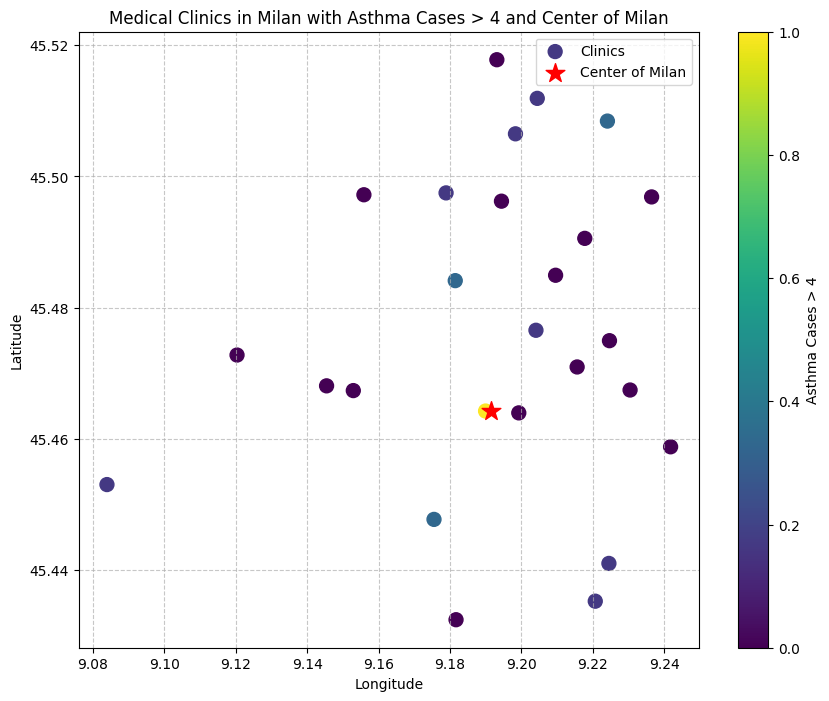

In [ ]:
# Filter coordinates with asthma cases > 4
coordinates_with_more_than_4 = coordinate_counts[coordinate_counts['asthma_cases'] > 4]

# Calculate the correlation between asthma cases and distance from the center
center_milan = {'LONG_X_4326': 9.1916, 'LAT_Y_4326': 45.4642}

coordinates_with_more_than_4['distance_to_center'] = (
    ((coordinates_with_more_than_4['LONG_X_4326'] - center_milan['LONG_X_4326'])**2 +
     (coordinates_with_more_than_4['LAT_Y_4326'] - center_milan['LAT_Y_4326'])**2)**0.5
)

correlation_more_than_4 = coordinates_with_more_than_4['asthma_cases'].corr(coordinates_with_more_than_4['distance_to_center'])

# Plot the coordinates of clinics and the center of Milan
plt.figure(figsize=(10, 8))
plt.scatter(coordinates_with_more_than_4['LONG_X_4326'], coordinates_with_more_than_4['LAT_Y_4326'],
            c=coordinates_with_more_than_4['asthma_cases'], cmap='viridis', s=100, label='Clinics')
plt.scatter(center_milan['LONG_X_4326'], center_milan['LAT_Y_4326'], color='red', s=200, marker='*', label='Center of Milan')

plt.colorbar(label='Asthma Cases > 4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Medical Clinics in Milan with Asthma Cases > 4 and Center of Milan')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
print(correlation_more_than_4)

-0.32050108177210823


In [ ]:
import folium

In [ ]:
# Recreate the folium map centered around Milan
milan_map = folium.Map(location=[45.4642, 9.1916], zoom_start=12)

# Add clinics with asthma cases > 4 as markers
for _, row in coordinates_with_more_than_4.iterrows():
    folium.CircleMarker(
        location=[row['LAT_Y_4326'], row['LONG_X_4326']],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Asthma Cases: {row['asthma_cases']}"
    ).add_to(milan_map)

# Add the Center of Milan (Duomo di Milano)
folium.Marker(
    location=[center_milan['LAT_Y_4326'], center_milan['LONG_X_4326']],
    icon=folium.Icon(color='red', icon='star'),
    popup='Center of Milan (Duomo di Milano)'
).add_to(milan_map)

milan_map